In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def minage_optimal(a, h, n, q, c):
   # q = hashrate de l'attaquant
   # n = nombre de block lors d'une attaque
   # c = cout
   # a = nb de blocks de l'attaquant 
   # h = nb de blocks de la blockchain oficielle
  
  if n==0 :
    if a > h :
      return a - (a-h)*c
    else :
      return 0

  if a  > h+1 : 
    return max( h+1-c + minage_optimal(a-h-1,0,n,q,c), q * minage_optimal(a+1, h, n-1, q, c) + (1-q) * (minage_optimal(a, h+1, n-1, q, c) - c))

  elif a == h+1 :
    return max( h+1-c , q * minage_optimal(a+1, h, n-1, q, c) + (1-q) * (minage_optimal(a, h+1, n-1, q, c) - c))

  elif a <= h :
    return max( 0 , q * minage_optimal(a+1, h, n-1, q, c) + (1-q) * (minage_optimal(a, h+1, n-1, q, c) - c))


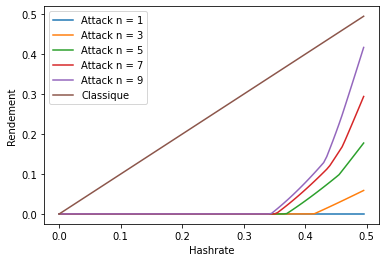

In [23]:



a = 0
h = 0
n = 5
positive_rendement = False

results =[]

for n in range(0,10):
  result =[]
  for i in np.arange(0, 0.5, 0.005):  # hashrate allant de 0 à 0.5 avec un intervalle de 0.005
    temp = minage_optimal(a, h, n, i, i) # le cout est égal au hashrate
    result.append(temp)
    if temp>i:
      if not positive_rendement : # permet de savoir à partir de quand le rendement est positif
            print("Le rendement est positif à partir de " +str(i))
            positive_rendement = True
  results.append(result)




y = np.arange(0,0.5,0.005)
y_axis = np.array(y)

plt.plot(y_axis, results[1], label = "Attack n = 1" ) 
plt.plot(y_axis, results[3], label = "Attack n = 3" ) 
plt.plot(y_axis, results[5], label = "Attack n = 5" ) 
plt.plot(y_axis, results[7], label = "Attack n = 7" ) 
plt.plot(y_axis, results[9], label = "Attack n = 9" ) 


plt.plot(y_axis,y_axis, label="Classique")

plt.legend()
plt.xlabel('Hashrate')
plt.ylabel('Rendement')
plt.show()